In [1]:
!pip install quandl

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl

In [10]:
df = quandl.get("NSE/OIL")

In [11]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2009-09-30,1096.0,1156.7,1090.0,1135.00,1141.20,19748012.0,223877.07
2009-10-01,1102.0,1173.7,1102.0,1167.00,1166.35,3074254.0,35463.78
2009-10-05,1152.0,1165.9,1136.6,1143.00,1140.55,919832.0,10581.13
2009-10-06,1149.8,1157.2,1132.1,1143.30,1144.90,627957.0,7185.90
2009-10-07,1153.8,1160.7,1140.0,1141.45,1141.60,698216.0,8032.98


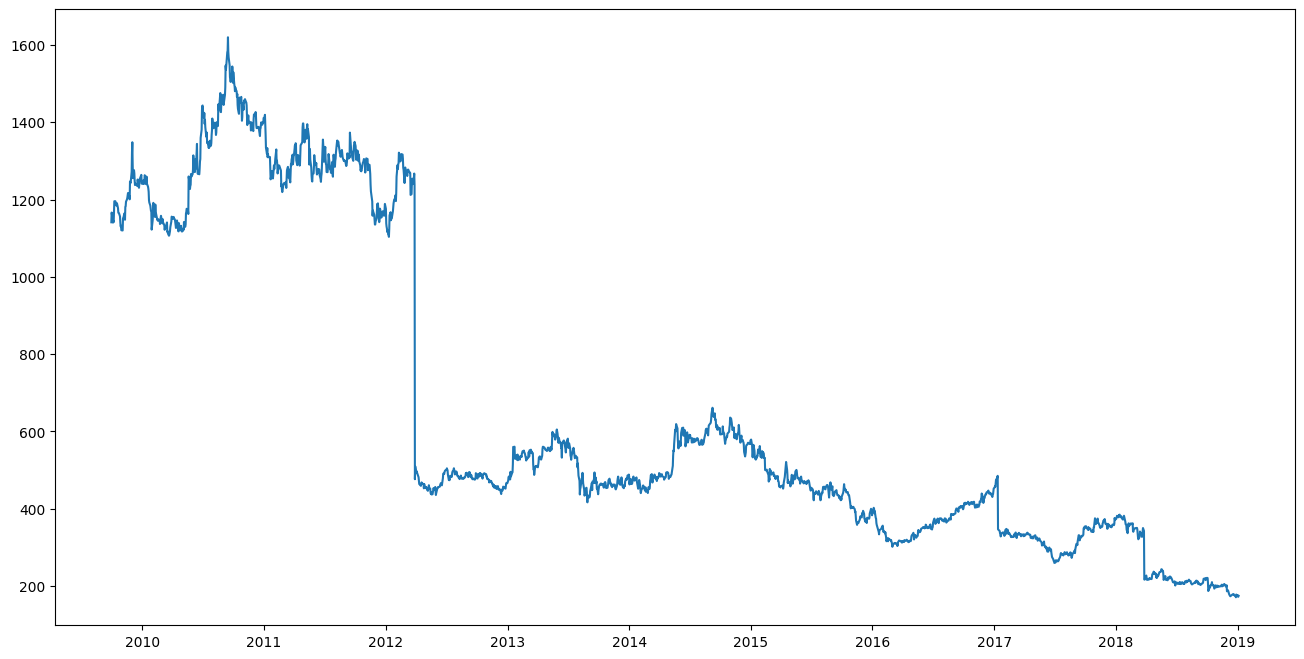

In [13]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Closing Price')

In [14]:
df['Open - Close'] = df['Open'] - df['Close']
df['High - Low'] = df['High'] - df['Low']

In [15]:
df = df.dropna()

In [16]:
X = df[['Open - Close', 'High - Low']]

In [17]:
X.head()

,Open - Close,High - Low
Date,,
2009-09-30,-45.20,66.7
2009-10-01,-64.35,71.7
2009-10-05,11.45,29.3
2009-10-06,4.90,25.1
2009-10-07,12.20,20.7


In [18]:
Y = np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [19]:
Y

array([ 1, -1,  1, ..., -1,  1, -1])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state= 44)

KNN Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))
print ('Train Accuracy: %.2f' %accuracy_train)
print ('Test Accuracy: %.2f' %accuracy_test)

Train Accuracy: 0.65
Test Accuracy: 0.48


In [28]:
predictions_classification = model.predict(X_test)

In [29]:
actual_predicted_data = pd.DataFrame({'Actual Class':y_test, 'Predicted Class':predictions_classification})


In [30]:
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,1,1
1,1,-1
2,1,1
3,1,-1
4,1,-1
5,1,1
6,-1,1
7,-1,1
8,-1,1
9,-1,1


from matplotlib import pyplot as plt
_df_5['Actual Class'].plot(kind='hist', bins=20, title='Actual Class')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Predicted Class'].plot(kind='hist', bins=20, title='Predicted Class')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Actual Class', y='Predicted Class', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Actual Class'].plot(kind='line', figsize=(8, 4), title='Actual Class')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Predicted Class'].plot(kind='line', figsize=(8, 4), title='Predicted Class')
plt.gca().spines[['top', 'right']].set_visible(False)

In [33]:
y = df['Close']

In [34]:
y

Date
2009-09-30    1141.20
2009-10-01    1166.35
2009-10-05    1140.55
2009-10-06    1144.90
2009-10-07    1141.60
               ...   
2018-12-31     174.80
2019-01-01     175.75
2019-01-02     172.40
2019-01-03     172.00
2019-01-04     174.55
Name: Close, Length: 2299, dtype: float64

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25, random_state=44)

params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)
model_reg.fit(X_train_reg, y_train_reg)
predictions = model_reg.predict(X_test_reg)

In [39]:
print(predictions)

[ 389.45833333  499.1125      260.02916667 1132.55        965.10416667
 1344.15        554.53333333 1078.1125      371.59166667  745.65
  754.02916667  957.475       468.80833333  579.0125      677.125
  440.39583333 1112.79166667  385.47916667  729.40833333 1314.20833333
  564.5875      364.05833333  814.16666667 1186.9375      605.6625
  450.67083333  327.95833333  548.34583333  452.86666667 1083.2
  524.375       763.12083333  279.66666667  333.09166667 1297.93333333
  910.82916667  409.9375      923.32083333  302.19166667  720.90416667
  539.24583333  549.12083333  505.175       396.09583333 1026.36666667
  403.99166667 1308.14583333  244.39583333  324.90416667  361.40416667
  399.2375      445.85833333  552.55416667  264.525       422.39583333
  240.02083333  909.79166667  423.11666667  343.74583333 1110.96666667
 1293.9875     1131.77916667  306.4         729.40833333  440.22083333
  380.6125      336.7375      345.60416667  361.25        433.75416667
  502.64166667 1279.14583333

In [40]:
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

726.4945238801654

In [43]:
vf = pd.DataFrame({'Actual Close':y_test_reg, 'Predicted Close value':predictions})

In [44]:
vf.head(10)

,Actual Close,Predicted Close value
Date,,
2016-07-21,374.80,389.458333
2012-04-25,452.75,499.112500
2016-04-12,318.05,260.029167
2010-02-15,1147.45,1132.550000
2013-07-11,526.70,965.104167
2009-12-01,1323.15,1344.150000
2015-01-13,535.20,554.533333
2011-06-03,1298.60,1078.112500
2016-05-19,341.00,371.591667


from matplotlib import pyplot as plt
_df_0['Actual Close'].plot(kind='hist', bins=20, title='Actual Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predicted Close value'].plot(kind='hist', bins=20, title='Predicted Close value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Actual Close', y='Predicted Close value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Actual Close'].plot(kind='line', figsize=(8, 4), title='Actual Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Predicted Close value'].plot(kind='line', figsize=(8, 4), title='Predicted Close value')
plt.gca().spines[['top', 'right']].set_visible(False)